In [25]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import json
import seaborn as sns

In [26]:
df = pd.read_json('./final_data.json')

In [51]:
df.head()

,product_name,product_ingredients,manufacturer,distributor,age,product_character,product_price,product_price_for_volume,additives_ingredients,volume
0,"CaliVita, D-drops Liquid Vitamin D, witamina D...","Średniołańcuchowe kwasy tłuszczowe (MCT), dejo...",USA,Wojcieszyn,adult/children,krople,129.99,"433,30 zł za 100 mililitrów",1,30
1,"Holistic, D3-vitamin Vegan, 50 ml","Ekologiczna oliwa z oliwek, witamina D3 (chole...",Sweden,ZielonaGóra,adult/children,krople,124.99,"249,98 zł za 100 mililitrów",0,50
3,"KenayAG, Witamina D3 2000 IU, 300 kapsułek",Rafinowany olej z nasion krokosza barwierskieg...,None,Kalisz,adult,kapsułki,99.99,"3,33 zł za 10 kapsułek",0,300
4,"Holistic D3-Vitamin 5000, witamina D 125 μg, 9...",Substancja wypełniająca: celuloza mikrokrystal...,Sweden,Wilkanowo,adult,kapsułki,95.99,"10,67 zł za 10 kapsułek",0,90
5,"CaliVita, D-drops Liquid Vitamin D, witamina D...","Średniołańcuchowe kwasy tłuszczowe (MCT), dejo...",USA,Wojcieszyn,adult/children,krople,95.99,"319,97 zł za 100 mililitrów",1,30


In [57]:
df['volume'].unique()

array([ 30,  50, 300,  90, 100,  60, 360, 120, 240, 250,   6,   9, 180,
        20, 200,   2,   3,  10, 125,  75,  25,  36,  15], dtype=int64)

In [29]:
df['product_price'] = df['product_price'].apply(lambda x: float(x[0:-3].replace(',', '.')))

In [30]:
df.describe(include='all')

,product_name,product_ingredients,manufacturer,distributor,age,product_character,product_key_ingredients,product_price,product_price_for_volume
count,241,241,241,241,241,241,241,241.000000,241
unique,241,197,110,44,26,15,35,NaN,211
top,"CaliVita, D-drops Liquid Vitamin D, witamina D...",Brak informacji,Brak informacji,Brak informacji,"dla dorosłych,",kapsułki,"witamina D,",NaN,"4,92 zł za 10 kapsułek"
freq,1,21,46,180,189,134,192,NaN,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.179004,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.899051,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.990000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.190000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.490000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.990000,NaN


In [31]:
df['additives_ingredients'] = [0 if x =='witamina D, ' else 1 for x in df['product_key_ingredients']]

In [32]:
df = df.drop(['product_key_ingredients'], axis=1)

In [33]:
def age(df):
    if 'dla dorosłych' in df['age'] and 'dla dzieci' in df['age']:
        val = 'adult/children'
    elif 'dla dorosłych' in df['age']:
        val = 'adult'
    else:
        val = 'children'
    return val

In [34]:
df['age'] = df.apply(age, axis=1)

In [35]:
def last_word(x):
    if 'Brak informacji' in x:
        val = None
    else:
        val = x.split()[-1].replace('.','')
    return val

In [36]:
df['manufacturer'] = df['manufacturer'].apply(last_word)
df['distributor'] = df['distributor'].apply(last_word)

In [37]:
df['manufacturer'].value_counts()

Warszawa              29
Wrocław               24
USA                   22
Legnica               17
Poznań                14
Kraków                 8
Opole                  7
Pabianice              6
Sopot                  6
Szwecja                5
Kozy                   5
Gdańsk                 5
11769                  3
Dębica                 3
Mielec                 3
Jedlińsk               3
NJ                     3
Dąbrowa                3
NoweMiastonadWartą     3
OstrówMazowiecka       2
Mazowiecka             2
UK                     2
GrodziskMazowiecki     2
Niemcy                 2
Białystok              2
95076                  2
Łódź                   1
StarogardGdański       1
Norrköping             1
Kutno                  1
Zambrów                1
Wadowice               1
Kielce                 1
Elbląg                 1
58108                  1
Dania                  1
Góra                   1
Zakroczym              1
Name: manufacturer, dtype: int64

In [38]:
def by_countries(df):
    if df in ['USA', '11769', 'NJ', '95076', '58108']:
        val = 'USA'
    elif df in ['Szwecja', 'Norrköping']:
        val = 'Sweden'
    elif df == 'UK':
        val = 'United Kingdom'
    elif df == 'Niemcy':
        val = 'Germany'
    elif df == 'Dania':
        val = 'Denmark'  
    elif df == None:
        val = None 
    else:
        val = 'Poland' 
    return val

In [39]:
df['manufacturer'] = df['manufacturer'].apply(by_countries)

In [40]:
df['volume'] = [x.split(',')[-1].split()[0] for x in df['product_name']]

In [41]:
df['product_character'].unique()

array(['krople', 'płyn', 'kapsułki', 'pastylki do ssania', 'tabletki',
       'żelki', 'saszetki', 'tabletki do żucia', 'aerozol',
       'tabletki do ssania', 'spray', 'proszek', 'tabletki musujące',
       'kapsułki twist-off', 'olej'], dtype=object)

In [42]:
categories_for_dropping = ['pastylki do ssania', 'płyn',
       'żelki', 'saszetki', 'tabletki do żucia', 'aerozol',
       'tabletki do ssania', 'spray', 'proszek', 'tabletki musujące',
       'kapsułki twist-off', 'olej']

In [43]:
df['product_character'] = [x if x not in categories_for_dropping else 'for dropping' for x in df['product_character']]
df = df.drop(df[(df['product_character'] == 'for dropping')].index)

In [44]:
index = df[(df['volume'] == 'krople')].index
index

Int64Index([41], dtype='int64')

In [55]:
df.iloc[[34]]

,product_name,product_ingredients,manufacturer,distributor,age,product_character,product_price,product_price_for_volume,additives_ingredients,volume
41,"MyVita Naturalne D3 Forte, witamina D 4000 j.m...","Oliwa z oliwek extra virgin BIO, witamina D (c...",Poland,None,adult,krople,35.99,"71,98 zł za 100 mililitrów",0,krople


In [56]:
df["volume"] = np.where(df["volume"] == "krople", 50, df["volume"])
df["volume"] = [int(x) for x in df["volume"]]

C:\Users\37529\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


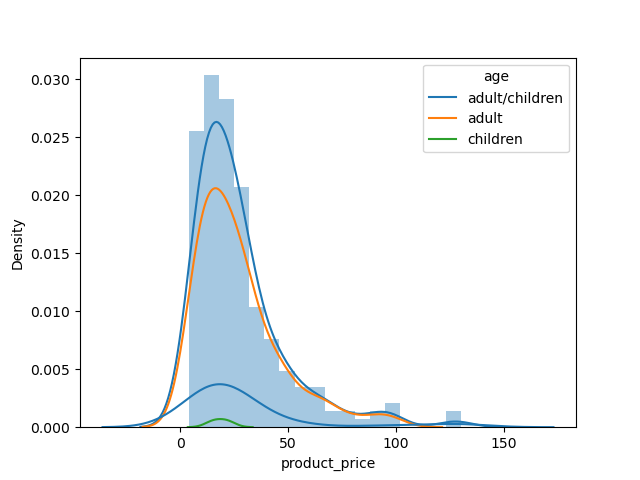

<AxesSubplot:xlabel='product_price', ylabel='Density'>

In [47]:
sns.distplot(df['product_price'])

In [48]:
sns.kdeplot(x= 'product_price', hue = 'age', data = df)

<AxesSubplot:xlabel='product_price', ylabel='Density'>

In [58]:
with open('df.json', 'w', encoding='utf-8') as file:
    df.to_json(file, force_ascii=False, orient='records')